### TRATAMIENTO Y MODELO DE PREDICCIÓN PARA OFRECER AYUDA PSICOLÓGICA

#### Objetivo

El fin de este proyecto es crear un modelo de predicción de Machine Learning supervisado con el fin de poder ofrecer ayuda psicológica.

El dataset se ha obtenido de la siguiente dirección 'https://www.kaggle.com/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses'

Además en la carpeta util se puede encontrar información relativa al scoring del DASS (escalas de Depresion, Ansiedad y Stress) y la clasificacion de las preguntas para cada tipo de estado

#### EDA

In [2]:

# IMPORTAMOS LAS LIBRERIAS PARA EL EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



import warnings
warnings.filterwarnings("ignore")

In [5]:
# CARGAMOS EL CSV Y ECHAMOS UN PRIMER VISTAZO

data = pd.read_csv('../../Data/Raw/data.csv', sep='\t')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [6]:
data.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


VAMOS A REVISAR CADA VARIABLE, VALORES NAN, UNICOS ETC

In [7]:
print (data['country'].unique())
print (data['country'].nunique())

['IN' 'US' 'PL' 'MY' 'MX' 'GB' 'DE' 'EE' 'CA' 'EC' 'AU' 'FI' 'ID' 'AE'
 'NONE' 'ES' 'NI' 'DO' 'TR' 'NO' 'GR' 'LK' 'BR' 'AR' 'KH' 'IT' 'MK' 'PT'
 'BA' 'RU' 'HU' 'KR' 'IE' 'RS' 'CZ' 'PH' 'RO' 'FR' 'SG' 'AT' 'UA' 'KW'
 'CO' 'GE' 'SE' 'HK' 'NZ' 'ZA' 'NL' 'DK' 'JM' 'LB' 'CL' 'AW' 'IL' 'GT'
 'PE' 'PK' 'NP' 'HR' 'CR' 'VE' 'BG' 'GH' 'MA' 'PR' 'SI' 'LV' 'AL' 'VN'
 'GU' 'BD' 'TH' 'NG' 'FO' 'UY' 'EG' 'BE' 'SA' 'SV' 'CH' 'PY' 'SK' 'SY'
 'TN' 'TT' 'SR' 'KE' 'BY' 'PA' 'CY' 'BW' 'MZ' 'BB' 'GG' 'CW' 'IS' 'IR'
 'BN' 'MV' 'OM' 'DZ' 'JP' 'MU' nan 'IQ' 'BO' 'MD' 'CN' 'LT' 'BZ' 'BH' 'ME'
 'QA' 'TW' 'PS' 'JO' 'SD' 'KY' 'AZ' 'AO' 'BS' 'GY' 'MO' 'TZ' 'IM' 'AF'
 'AM' 'UZ' 'LU' 'ET' 'JE' 'VU' 'TJ' 'KZ' 'XK' 'HN' 'ZW' 'LA' 'MT' 'SN'
 'MN' 'TG' 'SC' 'RE' 'VC']
145


In [8]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 2. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['voted'].unique())
print (data['voted'].nunique())
data[(data['voted']==0)].shape

[2 1 0]
3


(327, 172)

In [9]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 3. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['married'].unique())
print (data['married'].nunique())
data[(data['married']==0)].shape

[1 3 2 0]
4


(195, 172)

In [10]:
print (data['familysize'].unique())
print (data['familysize'].nunique())



[  2   4   3   5   1   6   8  12   7   0  11   9  13  10  62  16  14  99
  17  54  65  15  26  24  19  21  23 133]
28


In [11]:
# ANTES DE TOMAR UNA DECICISON SOBRE QUÉ HACER CON EL NÚMERO DE HIJOS ELEVADO, VAMOS A VER FILTRAR POR NUMERO DE HIJOS MAYOR A 10, PARA VER SU TAMAÑO

familysize_mayor10 = data[(data['familysize']>10)]
familysize_mayor10.shape

(216, 172)

In [12]:
# HACEMOS LO MISMO PARA NUMERO DE HIJOS MAYOR A 15
familysize_mayor15 = data[(data['familysize']>15)]
familysize_mayor15.shape

(18, 172)

In [13]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 4. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['education'].unique())
print (data['education'].nunique())
data[(data['education']==0)].shape

[2 1 3 4 0]
5


(515, 172)

In [14]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 3. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['gender'].unique())
print (data['gender'].nunique())
data[(data['gender']==0)].shape

[2 1 3 0]
4


(67, 172)

In [15]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 2. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['engnat'].unique())
print (data['engnat'].nunique())
data[(data['engnat']==0)].shape

[2 1 0]
3


(52, 172)

In [16]:
# VEO QUE HAY EDADES QUE NO TIENEN SENTIDO. TENGO QUE VER QUE HACER CON ELLAS
print (data['age'].unique())
print (data['age'].nunique())

[  16   17   13   19   20   29   18   15   31   34   22   42   21   23
   26   43   35   25   24   61   40   27   28   60   14   37   46   57
   41   55   36   30   32   56   71   67   44   38   49   45   47   33
   54   53   50   48   58   68   39   51   62   59   52   77   85   63
   69   65   75   72   70   73   64   66   79   80   78  223 1996   89
  117   82   74 1998   76  115 1993 1991   99]
79


In [17]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 3. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['hand'].unique())
print (data['hand'].nunique())
data[(data['hand']==0)].shape

[1 2 3 0]
4


(173, 172)

In [18]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 12. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['religion'].unique())
print (data['religion'].nunique())
data[(data['religion']==0)].shape

[12  7  4 10  2  6  1  8  3  0  5 11  9]
13


(356, 172)

In [19]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 5. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['orientation'].unique())
print (data['orientation'].nunique())
data[(data['orientation']==0)].shape

[1 0 3 5 2 4]
6


(3109, 172)

In [20]:
# LOS VALORES 0 SUPONEN CASI UN 8% DEL TOTAL 
(len(data[data['orientation']== 0])/data.shape[0])*100

7.816467630421118

In [21]:
print (data['race'].unique())
print (data['race'].nunique())

[10 70 60 50 30 40 20]
7


VAMOS CON LA TRANSFORMACION DE LOS DATOS Y ELIMINACION DE COLUMNAS

PARA ELLO IMPORTO LAS FUNCIONES Y VARIABLES CREADAS

Consultar funciones.py y variables.py para aclaraciones

In [6]:
from sys import path
sys.path.append('C:\\Users\\Laura\\Desktop\\Nueva carpeta\\Code\\util')

from funciones import drop_columns, cambio_respuestas, insert_column, ponderacion,categorizacion_anxiety,categorizacion_stress,categorizacion_depression,categorizacion_edad,categorizacion_familia,graficos_analisis
from variables import lista_patron, lista_new_columns, dicc_categorias, dicc_respuestas,lista_orden_colum, dicc_orientacion,dicc_genero,dicc_religion,dicc_raza,dicc_estado,dicc_lugar, colores,color_target

In [7]:
# HACEMOS COPIA DEL DATAFRAME

data_transf = data.copy()

In [8]:


# FUNCIONES PARA:
    # ELIMINACION DE COLUMNAS,
    # CAMBIAR LAS RESPUESTAS CON VALORACION DE 0 A 3, 
    # INTERCAR COLUMNAS NUEVAS
    # PODERACION DE LAS COLUMNAS NUEVAS CREADAS

data_transf= drop_columns(lista_patron, data_transf)
data_transf = cambio_respuestas(data_transf,dicc_respuestas)
data_transf = insert_column(lista_new_columns, data_transf)
data_transf = ponderacion(dicc_categorias, data_transf)


# FUNCIONES PARA LA CREACION DE NUEVAS COLUMNAS A PARTIR DE LAS ANTERIORES CREADAS Y DARLAS ETIQUETAS EN FUNCION DE LAS ETIQUETAS DEL MANUAL DASS
data_transf["Anxiety_cat"] = data_transf["Anxiety"].map(categorizacion_anxiety)
data_transf["Stress_cat"] = data_transf["Stress"].map(categorizacion_stress)
data_transf["Depression_cat"] = data_transf["Depression"].map(categorizacion_depression)


# FUNCIONES PARA LA TRANSFORMACION DE LOS CEROS 
data_transf['gender'] = np.where(data_transf['gender']== 0,3,data_transf['gender'].values)
data_transf['religion'] = np.where(data_transf['religion']== 0,12,data_transf['religion'].values)
data_transf['orientation'] = np.where(data_transf['orientation']== 0,5,data_transf['orientation'].values)
data_transf['married'] = np.where(data_transf['married']== 0,3,data_transf['married'].values)


# CREACION DE LA TARGET A TRAVES DE LAS COLUMNAS DE CATEGORIZACIÓN CREADAS EN EL PASO ANTERIOR

for x in range(data_transf.shape[0]):
    if data_transf.loc[x,'Depression_cat'] == 'Severe' or data_transf.loc[x,'Depression_cat'] == 'Extremely Severe':
        data_transf.loc[x,'Target'] = 1
    elif data_transf.loc[x,'Anxiety_cat'] == 'Severe' or data_transf.loc[x,'Anxiety_cat'] == 'Extremely Severe':
        data_transf.loc[x,'Target'] = 1
    elif data_transf.loc[x,'Stress_cat'] == 'Severe' or data_transf.loc[x,'Stress_cat'] == 'Extremely Severe':
        data_transf.loc[x,'Target'] = 1
    else:
        data_transf.loc[x,'Target'] = 0
        


# FUNCIONES PARA LA CREACION DE NUEVAS COLUMNAS CATEGORICAS PARA PODER VER LAS VISUALIZACIONES DE MANERA MAS SENCILLA
data_transf['Target'] = data_transf['Target'].apply(round)
data_transf["urban_cat"] = data_transf["urban"].map(dicc_lugar)
data_transf["age_cat"] = data_transf["age"].map(categorizacion_edad)
data_transf["familysize_cat"] = data_transf["familysize"].map(categorizacion_familia)
data_transf["gender_cat"] = data_transf["gender"].map(dicc_genero)
data_transf["religion_cat"] = data_transf["religion"].map(dicc_religion)
data_transf["orientation_cat"] = data_transf["orientation"].map(dicc_orientacion)
data_transf["married_cat"] = data_transf["married"].map(dicc_estado)
data_transf["race_cat"] = data_transf["race"].map(dicc_raza)



# REORGANIZACION DE LAS COLUMNAS

data_transf= data_transf.reindex(columns=lista_orden_colum)

ANALISIS DE LAS VARIABLES

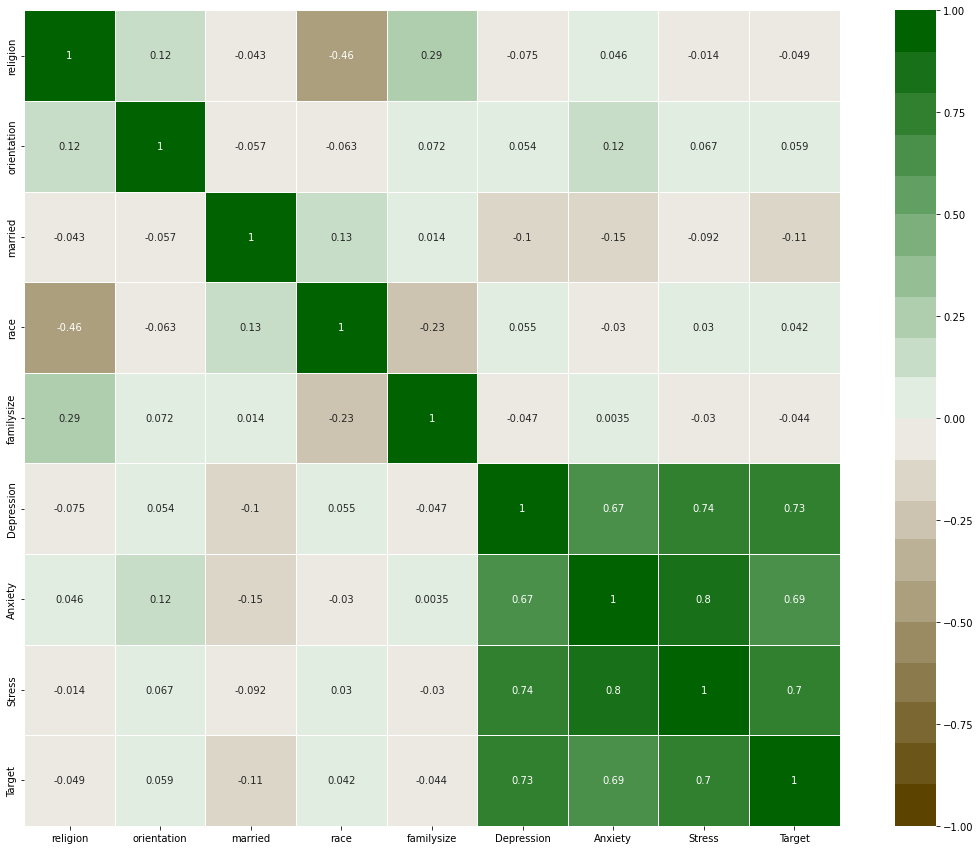

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(data_transf.iloc[ : ,-18: ].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(75, 500, s=500, l=28, n=20),
            square=True,
            annot=True,
            linewidths=.5);

Hay poca correlación entre las variables, salvo las generadas manualmente :
 - Depression
 - Anxiety
 - Stress
que además de tener correlación directa con el Target, que ha sido generado a partir de estas tres features, tienen correlacion entre ellas


In [26]:
# VEO LA COMPOSICION DE LA TARGET

data_transf['Target'].value_counts()

1    25481
0    14294
Name: Target, dtype: int64

VISUALIZACION DE LOS DATOS


Primero comienzo vizualizando, de todas las personas encuestadas, cuantas necesitarían ayuda


Text(0.5, 1.0, 'Total personas encuestadas:  3977')

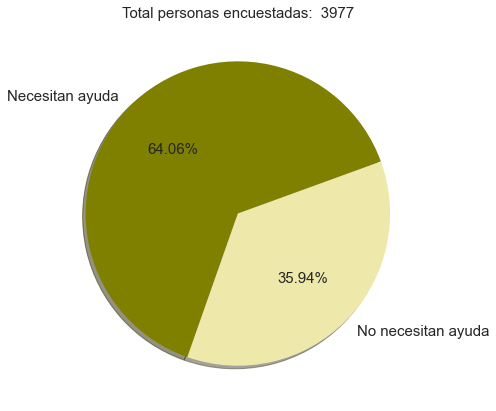

In [29]:
graf_target= plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')

# plt.subplot(1,2,1)
info_color = ('#808000','#EEE8AA')

plt.pie(data_transf['Target'].value_counts() ,
        labels= ['Necesitan ayuda', 'No necesitan ayuda'],
        autopct='%1.2f%%',
        colors= info_color,
        shadow = True,
        startangle= 20,        
        textprops= {'fontsize':15})
plt.title('Total personas encuestadas:  3977',fontsize = 15, loc= 'center' )

#graf_target.savefig ('../util/Graficos/graf_target.png')

Ahora voy a mostrar de las features que me parecen más importante, la composición de las mismas

Text(0.5, 1.0, 'Religión')

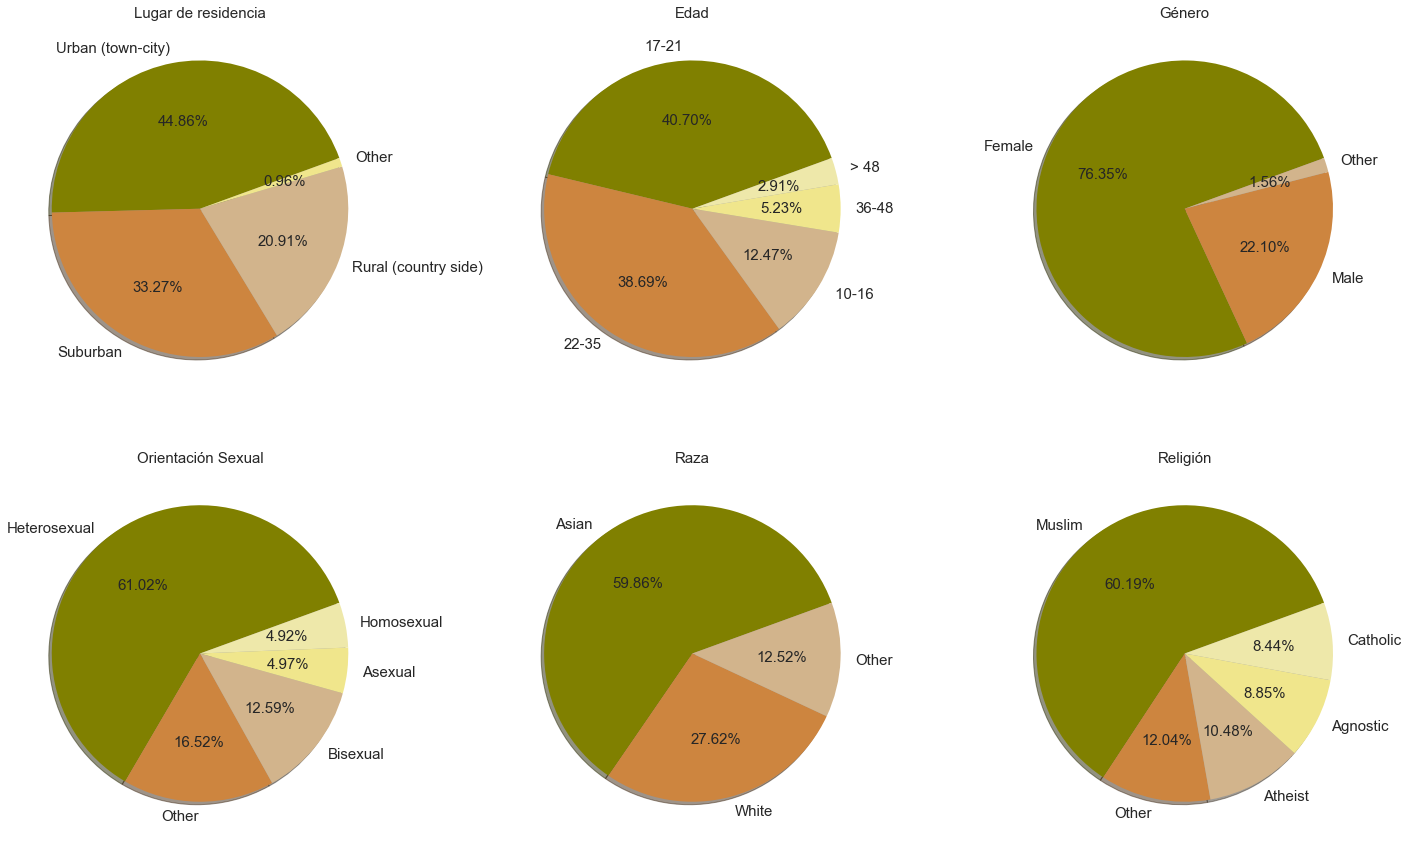

In [30]:
graf_resu_features=plt.figure(figsize=(25,15))
plt.style.use('seaborn-whitegrid')

plt.subplot(2,3,1)

info_color = list(reversed(colores))
plt.pie(data_transf['urban_cat'].value_counts() ,
        labels=data_transf['urban_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15})
plt.title('Lugar de residencia',fontsize = 15, loc='center' )

plt.subplot(2,3,2)
plt.pie(data_transf['age_cat'].value_counts() ,
        labels=data_transf['age_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15})
plt.title('Edad',fontsize = 15, loc='center' )

plt.subplot(2,3,3)

plt.pie(data_transf['gender_cat'].value_counts() ,
        labels=data_transf['gender_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15})
plt.title('Género',fontsize = 15, loc='center' )

plt.subplot(2,3,4)

plt.pie(data_transf['orientation_cat'].value_counts() ,
        labels=data_transf['orientation_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15});
plt.title('Orientación Sexual',fontsize = 15, loc='center' )

plt.subplot(2,3,5)

plt.pie(data_transf[(data_transf['race_cat'] =='Asian') | (data_transf['race_cat'] =='Other') | (data_transf['race_cat'] =='White')]['race_cat'].value_counts() ,
        labels=data_transf[(data_transf['race_cat'] =='Asian') | (data_transf['race_cat'] =='Other') | (data_transf['race_cat'] =='White')]['race_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15});
plt.title('Raza',fontsize = 15, loc='center' )

plt.subplot(2,3,6)

plt.pie(data_transf[(data_transf['religion_cat'] =='Muslim') | (data_transf['religion_cat'] =='Other') | (data_transf['religion_cat'] =='Atheist')| (data_transf['religion_cat'] =='Agnostic')| (data_transf['religion_cat'] =='Catholic')]['religion_cat'].value_counts() ,
        labels=data_transf[(data_transf['religion_cat'] =='Muslim') | (data_transf['religion_cat'] =='Other') | (data_transf['religion_cat'] =='Atheist')| (data_transf['religion_cat'] =='Agnostic')| (data_transf['religion_cat'] =='Catholic')]['religion_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15});

plt.title('Religión',fontsize = 15, loc='center' )

#graf_resu_features.savefig ('../util/Graficos/graf_resu_features.png')

 

VOY A HACER 4 GRAFICOS POR CADA FEATURE:

- Gráfico por cada feature y target para ver como se reparte

- Tres gráficos más, mostrando la información de la feature por depresión, ansiedad y estrés


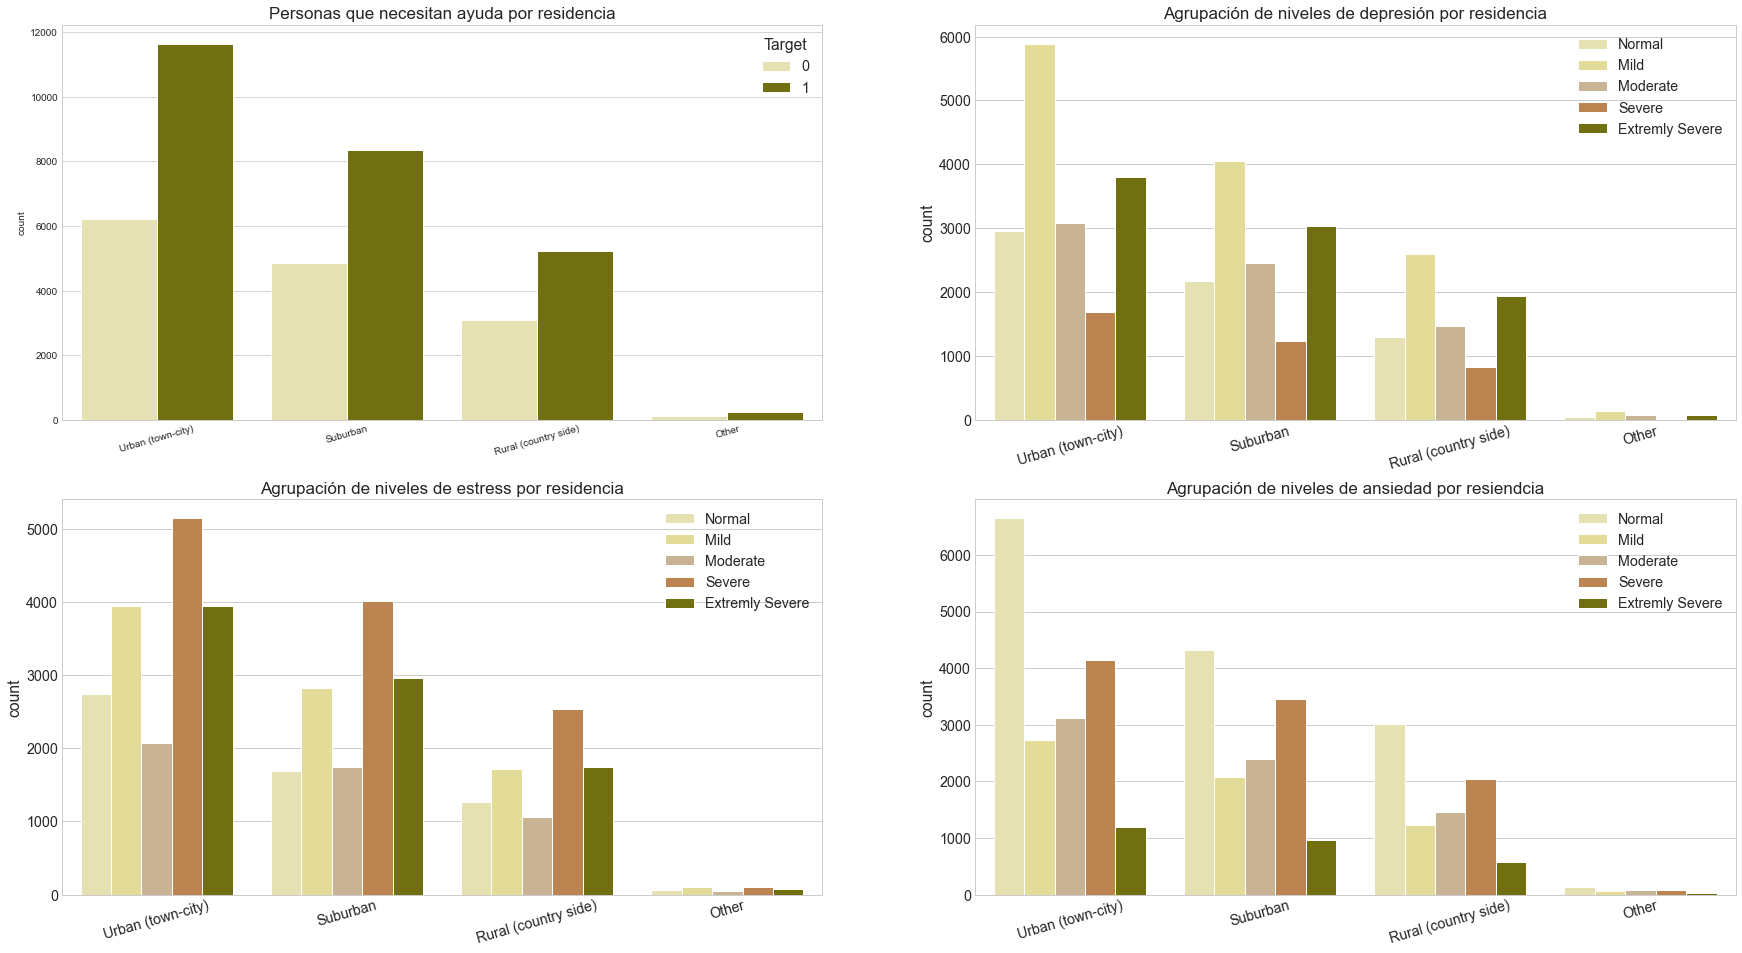

In [9]:

graf_urban_cat = plt.figure(figsize=(30,16))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'urban_cat','Target','Personas que necesitan ayuda por residencia',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'urban_cat','Depression_cat','Agrupación de niveles de depresión por residencia',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'urban_cat','Stress_cat','Agrupación de niveles de estress por residencia',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'urban_cat','Anxiety_cat','Agrupación de niveles de ansiedad por resiendcia',color_target, colores);

#graf_urban_cat.savefig ('../util/Graficos/graf_urban_cat.png')

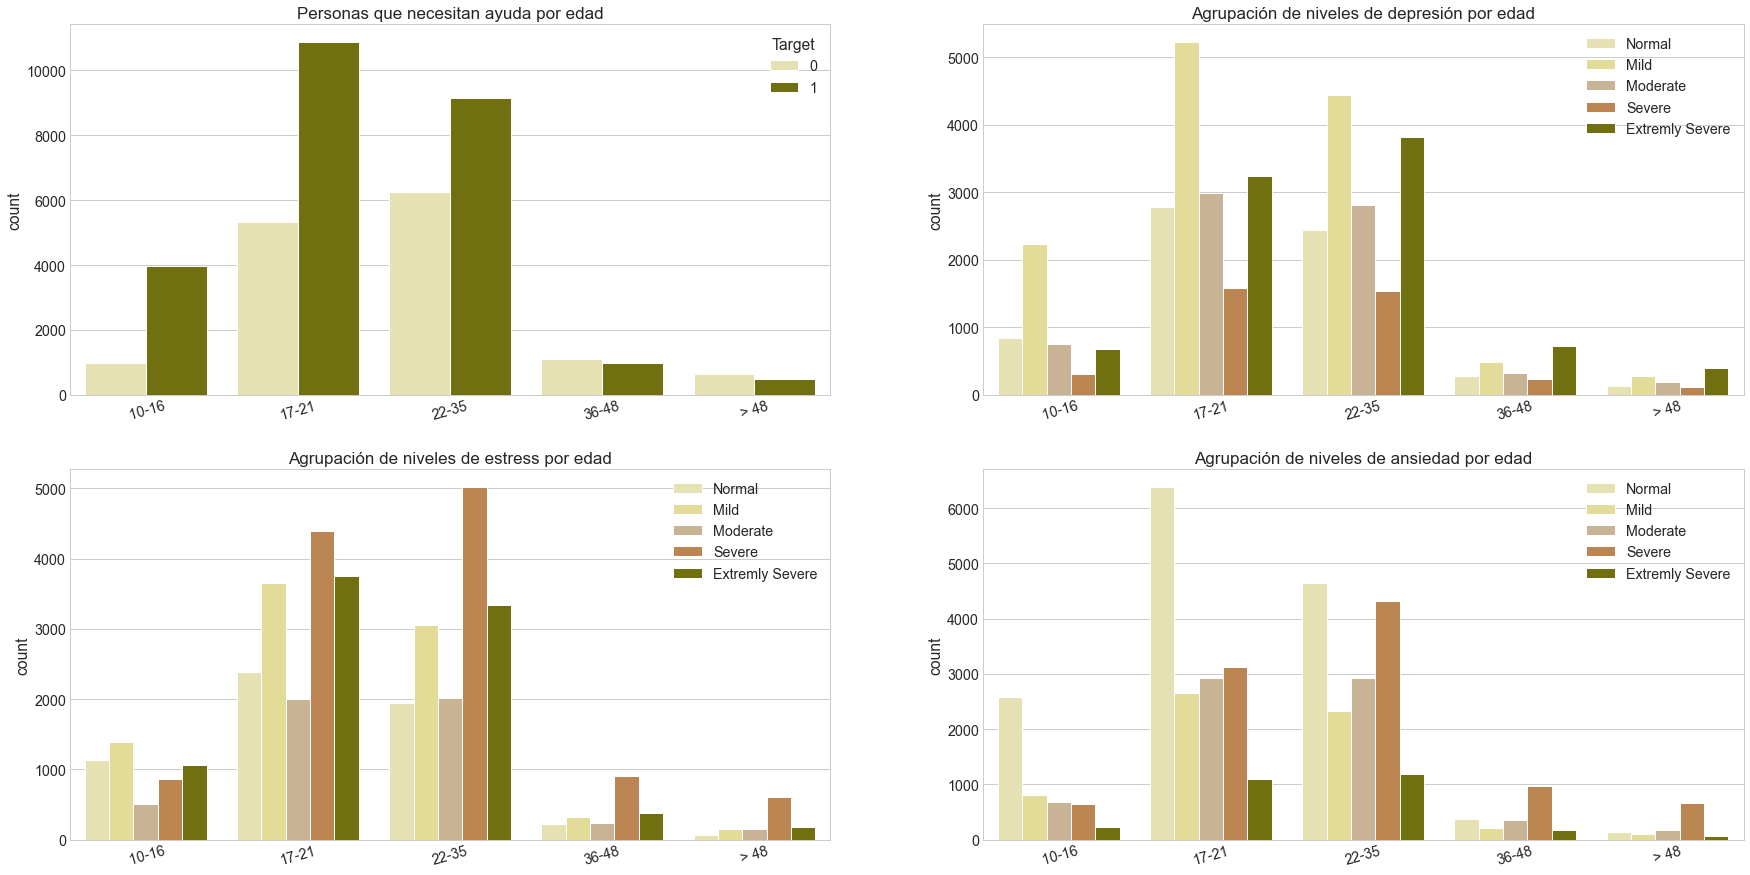

In [10]:
graf_age_cat = plt.figure(figsize=(30,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'age_cat','Target','Personas que necesitan ayuda por edad',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'age_cat','Depression_cat','Agrupación de niveles de depresión por edad',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'age_cat','Stress_cat','Agrupación de niveles de estress por edad',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'age_cat','Anxiety_cat','Agrupación de niveles de ansiedad por edad',color_target,colores);


#graf_age_cat.savefig ('../util/Graficos/graf_age_cat.png')

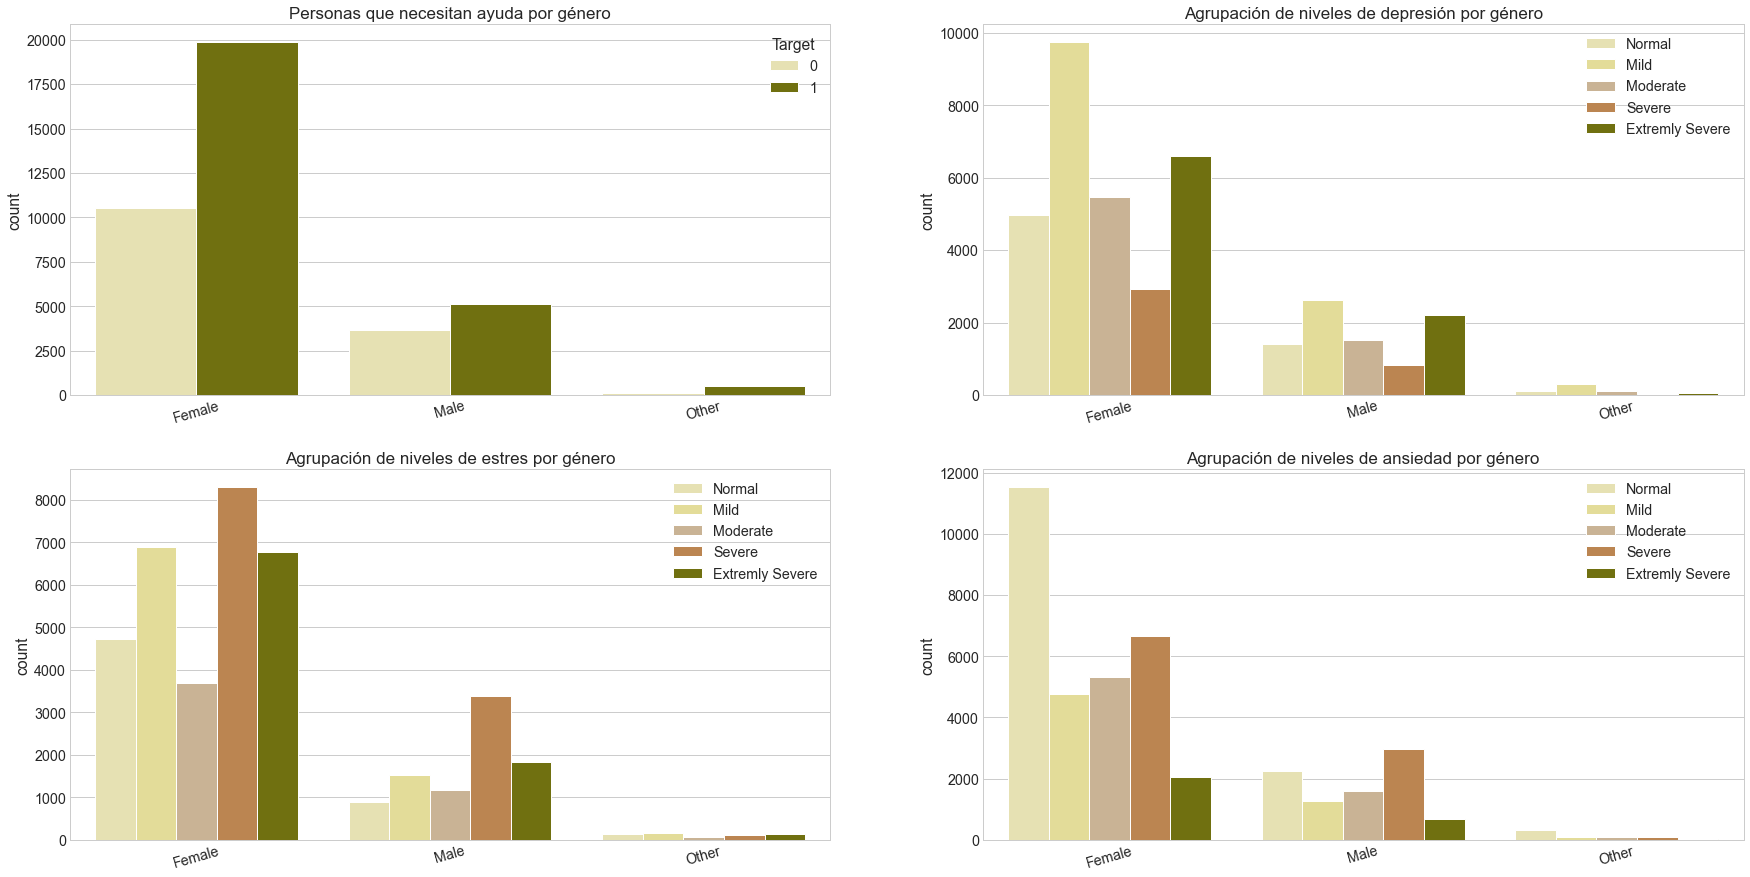

In [11]:


graf_gender_cat = plt.figure(figsize=(30,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'gender_cat','Target','Personas que necesitan ayuda por género',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'gender_cat','Depression_cat','Agrupación de niveles de depresión por género',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'gender_cat','Stress_cat','Agrupación de niveles de estres por género',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'gender_cat','Anxiety_cat','Agrupación de niveles de ansiedad por género',color_target,colores);

#graf_gender_cat.savefig ('../util/Graficos/graf_gender_cat.png')

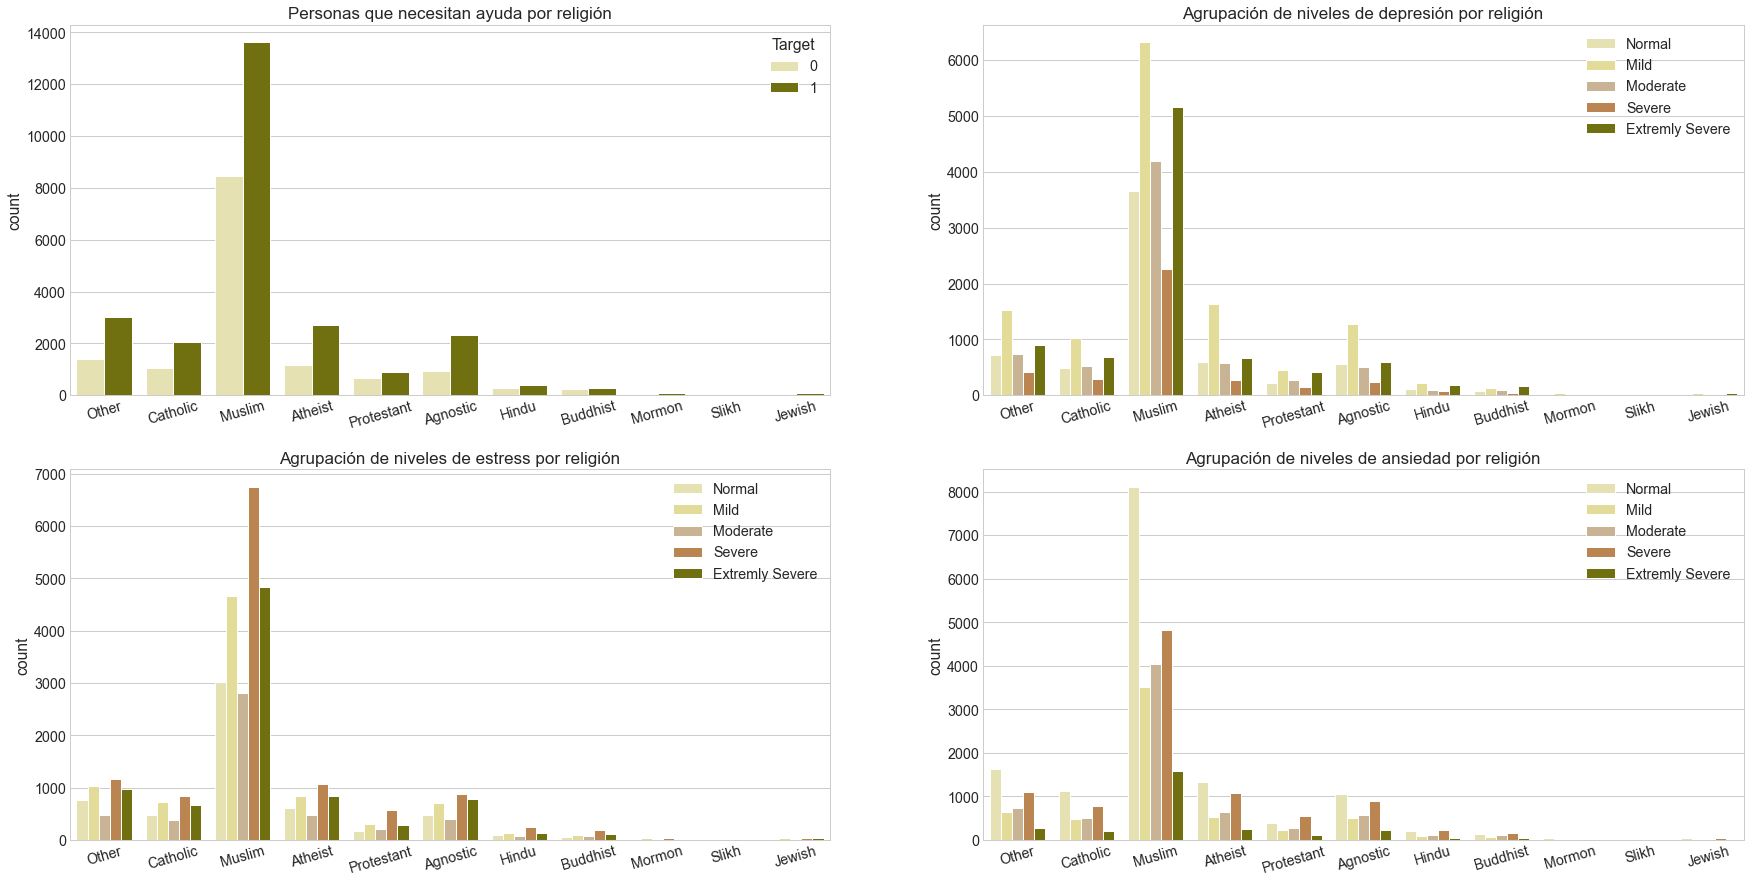

In [12]:
graf_religion_cat = plt.figure(figsize=(30,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'religion_cat','Target','Personas que necesitan ayuda por religión',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'religion_cat','Depression_cat','Agrupación de niveles de depresión por religión',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'religion_cat','Stress_cat','Agrupación de niveles de estress por religión',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'religion_cat','Anxiety_cat','Agrupación de niveles de ansiedad por religión',color_target,colores);


#graf_religion_cat.savefig ('../util/Graficos/graf_religion_cat.png')

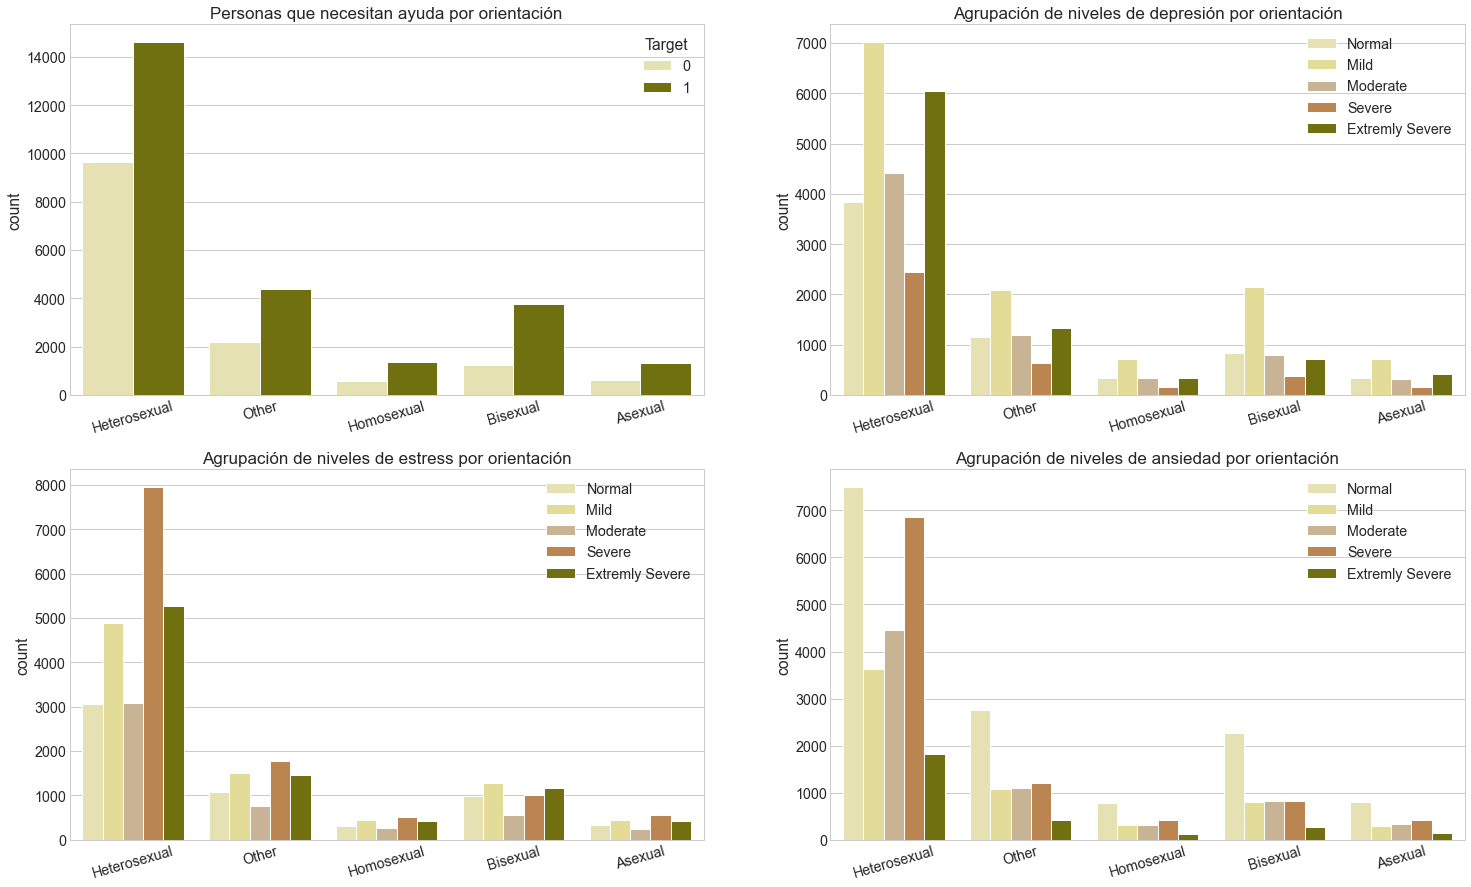

In [13]:
graf_orientation_cat =plt.figure(figsize=(25,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'orientation_cat','Target','Personas que necesitan ayuda por orientación',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'orientation_cat','Depression_cat','Agrupación de niveles de depresión por orientación',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'orientation_cat','Stress_cat','Agrupación de niveles de estress por orientación',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'orientation_cat','Anxiety_cat','Agrupación de niveles de ansiedad por orientación',color_target,colores);



#graf_orientation_cat.savefig ('../util/Graficos/graf_orientation_cat.png')

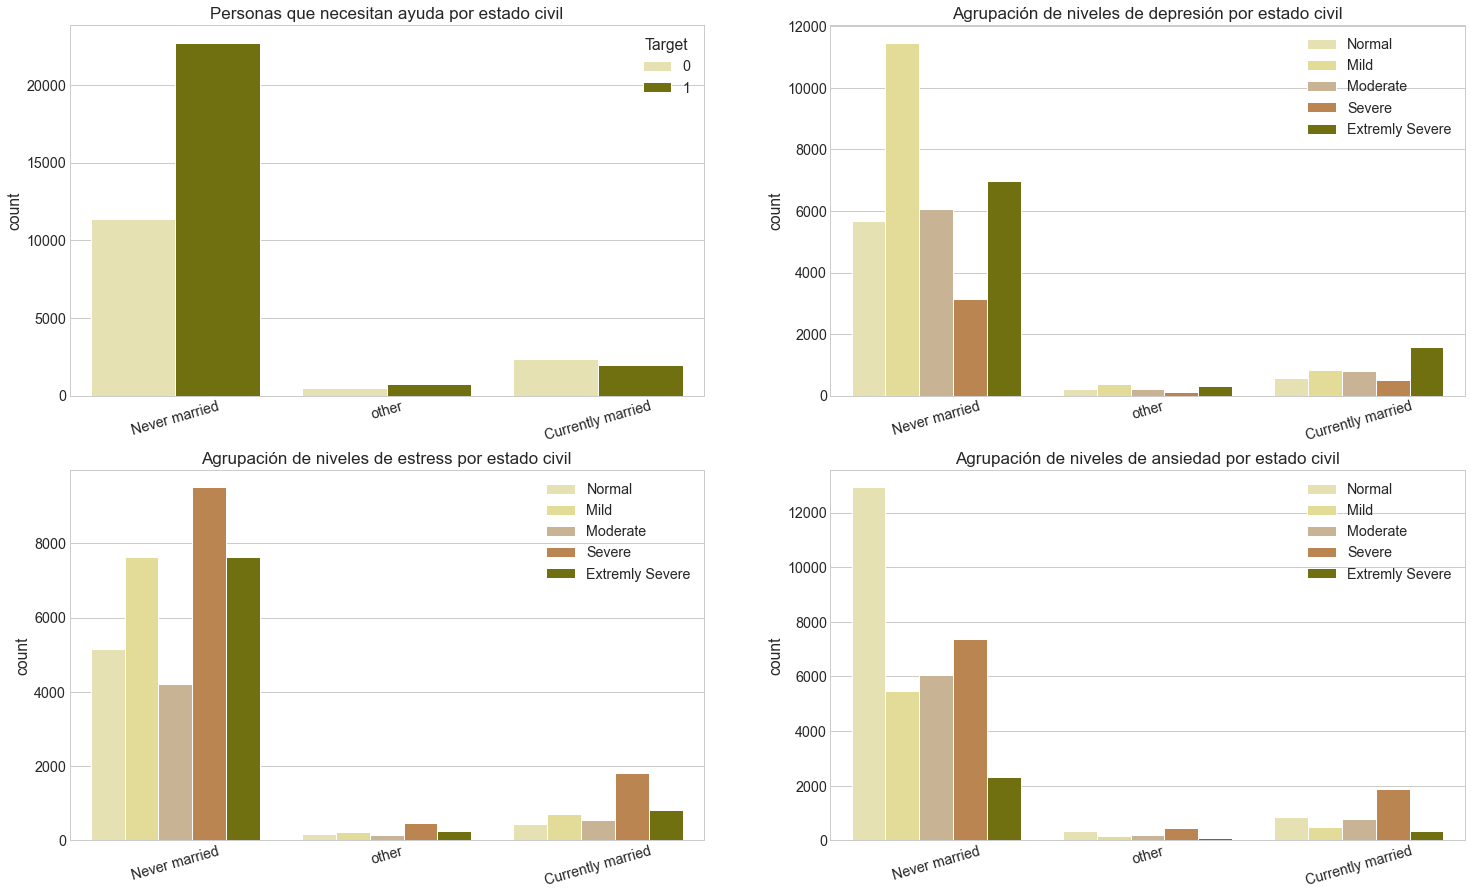

In [14]:
graf_married_cat = plt.figure(figsize=(25,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'married_cat','Target','Personas que necesitan ayuda por estado civil',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'married_cat','Depression_cat','Agrupación de niveles de depresión por estado civil',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'married_cat','Stress_cat','Agrupación de niveles de estress por estado civil',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'married_cat','Anxiety_cat','Agrupación de niveles de ansiedad por estado civil',color_target,colores);


#graf_married_cat.savefig ('../util/Graficos/graf_married_cat.png')

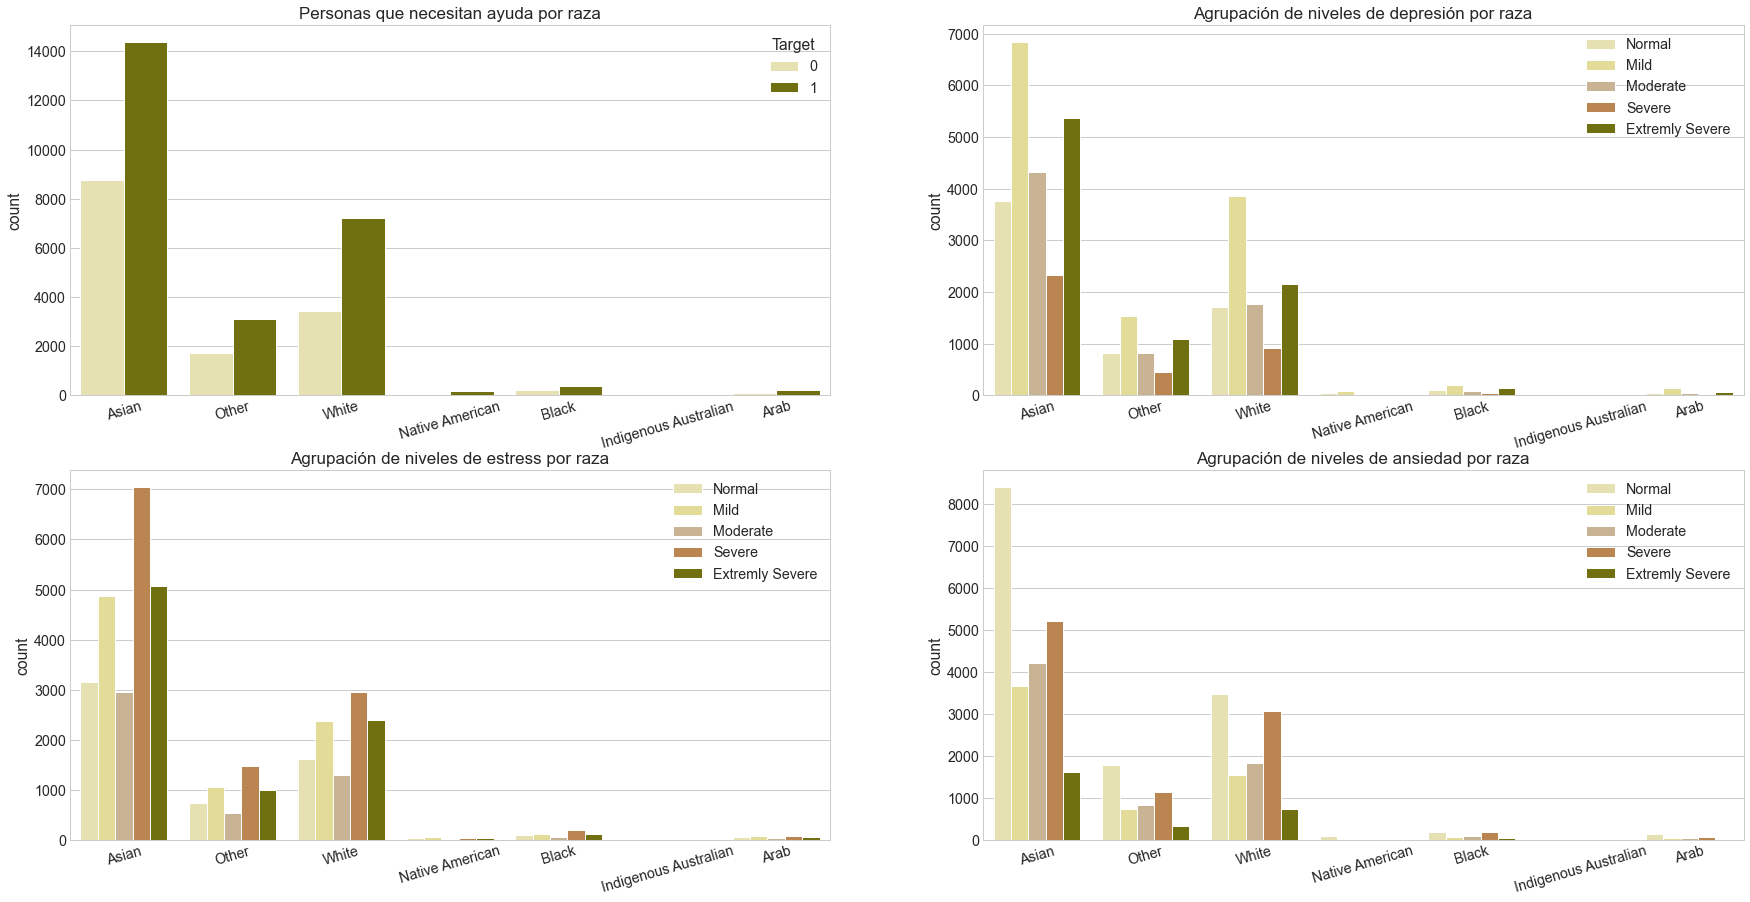

In [15]:
graf_race_cat = plt.figure(figsize=(30,15))


plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'race_cat','Target','Personas que necesitan ayuda por raza',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'race_cat','Depression_cat','Agrupación de niveles de depresión por raza',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'race_cat','Stress_cat','Agrupación de niveles de estress por raza',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'race_cat','Anxiety_cat','Agrupación de niveles de ansiedad por raza',color_target,colores);


#graf_race_cat.savefig ('../util/Graficos/graf_race_cat.png')

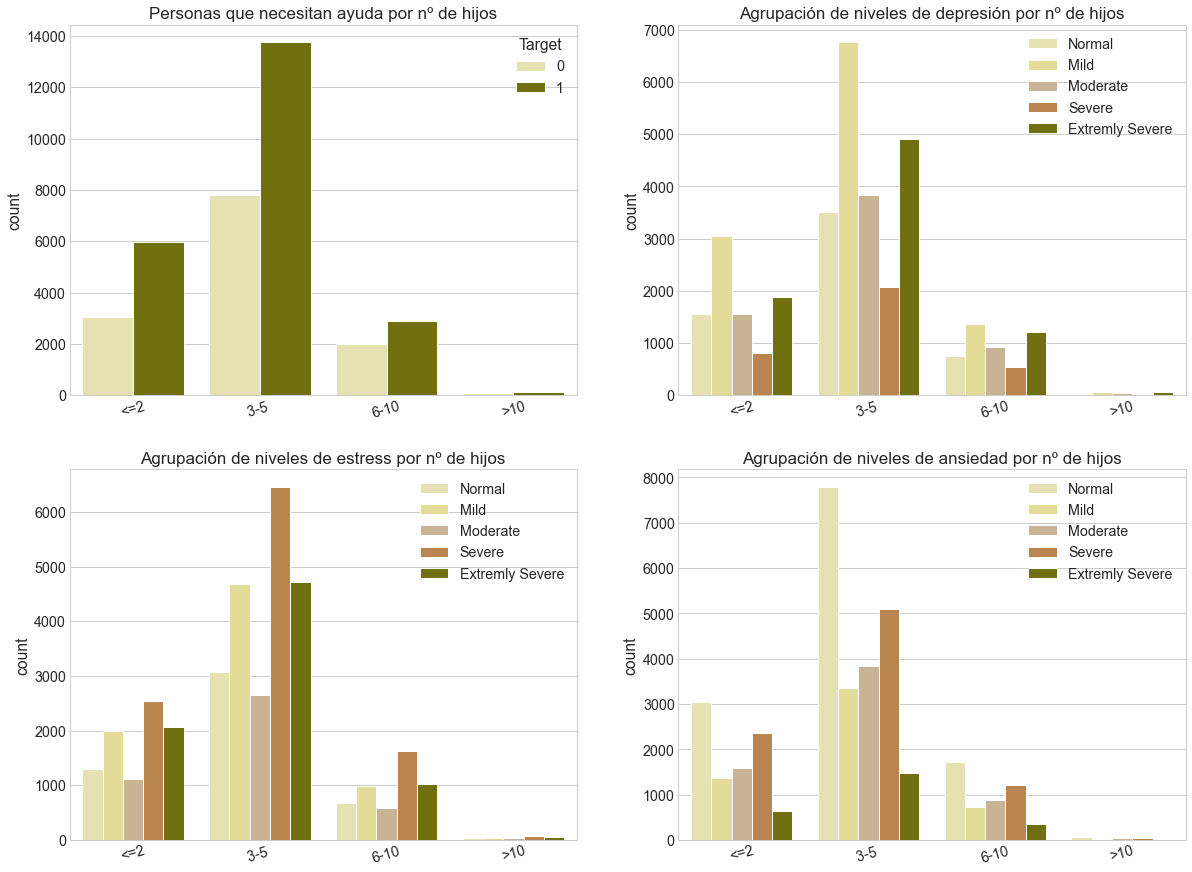

In [16]:
graf_familysize_cat = plt.figure(figsize=(20,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'familysize_cat','Target','Personas que necesitan ayuda por nº de hijos',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'familysize_cat','Depression_cat','Agrupación de niveles de depresión por nº de hijos',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'familysize_cat','Stress_cat','Agrupación de niveles de estress por nº de hijos',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'familysize_cat','Anxiety_cat','Agrupación de niveles de ansiedad por nº de hijos',color_target,colores);

#graf_familysize_cat.savefig ('../util/Graficos/graf_familysize_cat.png')

In [ ]:
# GUARDO EL CSV PROCESADO

data_transf[['urban','age','gender','religion','orientation','married','race','familysize','Depression','Anxiety','Stress','Target']].to_csv('../Data/Processed/data_processed.csv')

#### CONSTRUCCION DE LOS MODELOS

EMPEZAMOS PRIORIZANDO LA RECALL

Al tratarse de un problema de clasificación en el que además de clasificar bien los true possitive, necesitamos que los false negative sean bajos

In [19]:
# IMPORTAMOS TODAS LAS LIBRERIAS QUE VAMOS A UTILIZAR

from sys import path
sys.path.append('C:\\Users\\Laura\\Desktop\\Nueva carpeta\\Code\\util')
from funciones import graficos_conf_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score,confusion_matrix,recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
import pickle

LOGISTIC REGRESSION

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO Y TRANSFORMADO
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST

X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS
model_lr = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('lr', LogisticRegression())]
                    ) 


params = {'lr__penalty' : ['l1','l2','elasticnet'],
              'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'lr__max_iter': [100,200,300,400,500],
              'lr__C': [0.8,0.5,0.3]
            }


logistic_gtc = GridSearchCV(model_lr, params, cv=5, scoring='recall')
logistic_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_lr_V0 = logistic_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES
model_lr_V0
model_lr_V0.fit(X_train,y_train)
y_predi = model_lr_V0.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAME
df_scores = {'log_re_data_train' :[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]}
df_scores = pd.DataFrame(df_scores, index=['Recall','Auc','Accuracy', 'F1_score'])

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_logist_V0', 'wb') as archivo_salida:
    pickle.dump(model_lr_V0, archivo_salida)


In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_logist_V0', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAME
df_scores['log_re_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Recall.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

RANDOM FOREST

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST

X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS
model_rf = RandomForestClassifier() 


params = {'n_estimators' : range(100,500,100),
           'criterion': ['gini', 'entropy'],
           'max_depth':range(2,5),
           'max_leaf_nodes':range(2,10),
           'min_samples_split':range(50,300,50),
           'random_state' : [42],
            }


random_forest_gtc = GridSearchCV(model_rf, params, cv=5, scoring='f')
random_forest_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_rf_V0 = random_forest_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES
model_rf_V0
model_rf_V0.fit(X_train,y_train)
y_predi = model_rf_V0.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAME

df_scores = pd.read_csv('../Model/scores_models_Recall.csv', index_col=0)
df_scores['rf_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_rf_V0', 'wb') as archivo_salida:
    pickle.dump(model_rf_V0, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_rf_V0', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['rf_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Recall.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

KNN

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

scale = MinMaxScaler()
scale.fit(X_train)

X_train_scale = scale.transform(X_train)
X_test_scale= scale.transform(X_test)


In [ ]:
# CON KNN VAMOS A VER PRIMERO CUAL ES EL MEJOR VALOR DE LA K SIN UTILIZAR GRIDSEARCH NI PIPELINE, POR ESO PREVIAMENTE HEMOS ESCALADO LOS DATOS

k_range= range(1,100)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_scale, y_train)
    scores.append(knn.score(X_test_scale, y_test))

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(np.arange(0,100,5));

In [ ]:
# SACAMOS EL MEJOR VALOR DE LA K

np.array(k_range)[scores ==max(scores)]

In [ ]:
# INVERTIMOS EL ESCALADO

X_train = scale.inverse_transform(X_train_scale)
X_test = scale.inverse_transform(X_test_scale)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN RANDOMIZW CROSS VALIDATIION, ES MAS RAPIDO QUE EL GRIDSEARCH
# LO INSTANCIAMOS

model_knn = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())]
                    )  


params = {'knn__n_neighbors' : range(20,75,1)
         }


model_knn_gtc = RandomizedSearchCV(model_knn, params, cv=5, scoring='recall')
model_knn_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_knn_V0 = model_knn_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES

model_knn_V0.fit(X_train,y_train)
y_predi = model_knn_V0.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Recall.csv', index_col=0)
df_scores['knn_data_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_knn_V0', 'wb') as archivo_salida:
    pickle.dump(model_knn_V0, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_knn_V0', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['knn_data_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Recall.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

XGBOOST

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

In [ ]:

# PROBAMOS  CON UN RANDOMIZEDSEARCHCV
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS

model_xgb = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('xgb', XGBClassifier())]
                    )  


params = {
          'xgb__max_depth' : range(3,10),
          'xgb__min_child_weight': range(1,50,3),
          'xgb__alpha': np.arange(0,0.5,0.1),
          'xgb__eta': np.arange(0.1,0.3,0.1)
         }


model_xgb_rsc = RandomizedSearchCV(model_xgb, params, cv=5, scoring='recall',n_iter= 100)
model_xgb_rsc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_xgb_V0 = model_xgb_rsc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES

model_xgb_V0.fit(X_train,y_train)
y_predi = model_xgb_V0.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Recall.csv', index_col=0)
df_scores['xgb_data_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_xgb_V1', 'wb') as archivo_salida:
    pickle.dump(model_xgb_V0, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_xgb_V1', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['xgb_data_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Recall.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

RESUMEN SCORIN Y CONFUSION MATRIX RECALL

In [22]:
data_scores_recall = pd.read_csv('../../Model/scores_models_Recall.csv')
data_scores_recall

,Unnamed: 0,log_re_data_train,log_re_test,knn_data_train,knn_data_test,xgb_data_train,xgb_data_test,rf_train,rf_test
0,Recall,0.892715,0.896218,0.867219,0.865694,0.853311,0.850941,1.000000,1.000000
1,Auc,0.841965,0.847397,0.854602,0.862965,0.865332,0.871072,0.500000,0.500000
2,Accuracy,0.855437,0.858894,0.857951,0.863608,0.862141,0.866331,0.632726,0.617746
3,F1_score,0.886550,0.886968,0.885396,0.886901,0.886786,0.887199,0.775055,0.763712


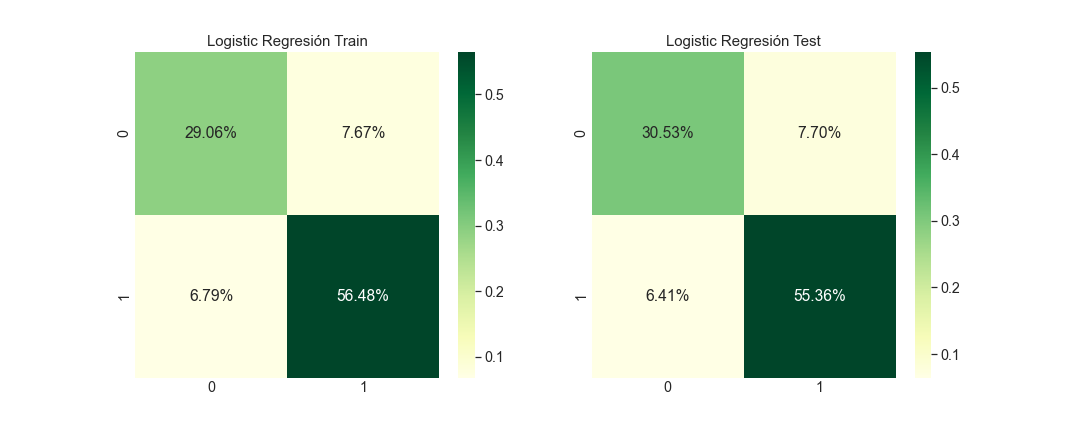

In [24]:
from IPython.display import Image
Image("../../util/Graficos/graf_lg_R_matriz.png")

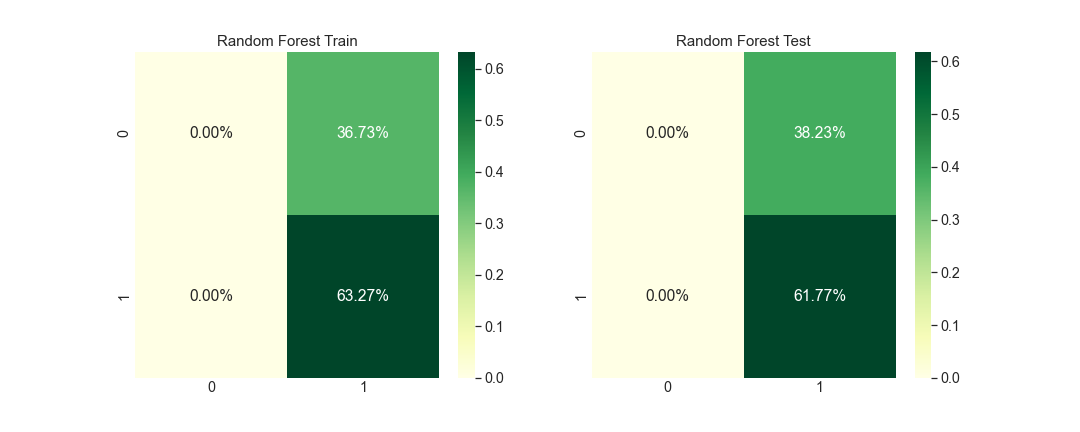

In [25]:
Image("../../util/Graficos/graf_rf_R_matriz.png")

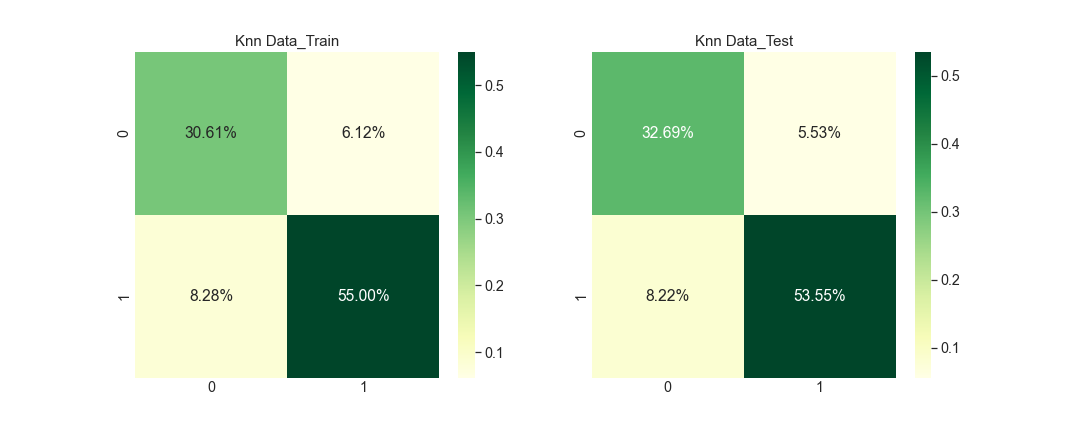

In [30]:
Image("../../util/Graficos/graf_knn_R_matriz.png")

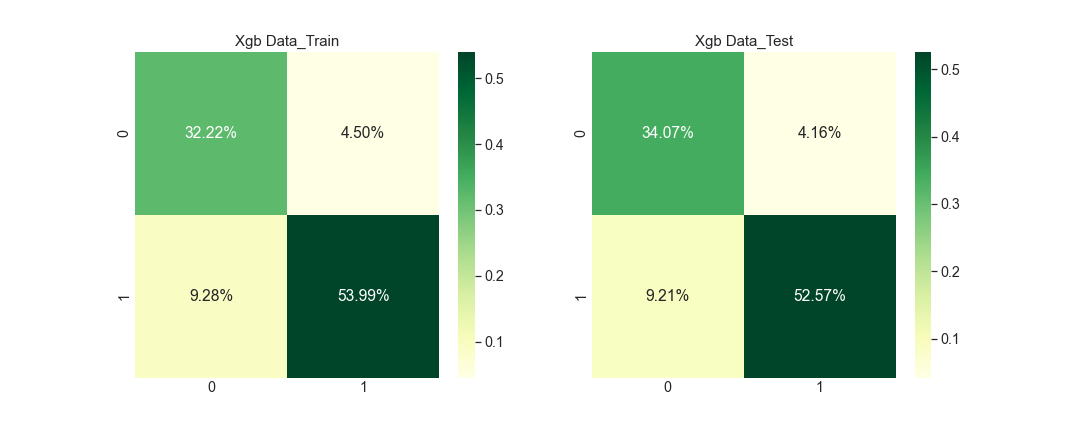

In [39]:
Image("../../util/Graficos/graf_xgb_R_matriz.png")

Por el momento el modelo que mejor Recall está dando es la Logistic Regresion ya que su nivel de falsos positivos en el más bajo

CONTINUAMOS EN ESTE CASO PRIORIZANDO LA ACCURACY

LOGISTIC REGRESION

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS
model_lr = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('lr', LogisticRegression())]
                    ) 


params = {'lr__penalty' : ['l1','l2','elasticnet'],
              'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'lr__max_iter': [100,200,300,400,500],
              'lr__C': [0.8,0.5,0.3]
            }


logistic_gtc = GridSearchCV(model_lr, params, cv=5, scoring='accuracy')
logistic_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_lr_V0 = logistic_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES
model_lr_V0
model_lr_V0.fit(X_train,y_train)
y_predi = model_lr_V0.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAME MENO LA CONFUSION MATRIX
df_scores = {'log_re_data_train' :[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]}
df_scores = pd.DataFrame(df_scores, index=['Recall','Auc','Accuracy', 'F1_score'])

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_logist_V1', 'wb') as archivo_salida:
    pickle.dump(model_lr_V0, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_logist_V1', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['log_re_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Accu.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

RANDOM FOREST

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN RANDOMIZE CON CROSS VALIDATIION PORQUE TARDA MENOS
# LO INSTANCIAMOS
model_rf = RandomForestClassifier() 


params = {'n_estimators' : range(100,500,100),
           'criterion': ['gini', 'entropy'],
           'max_depth':range(2,5),
           'max_leaf_nodes':range(2,10),
           'min_samples_split':range(50,300,50),
           'random_state' : [42],
            }


random_forest_gtc = RandomizedSearchCV(model_rf, params, cv=5, scoring='accuracy', n_iter=100)
random_forest_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_rf_V1 = random_forest_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES
model_rf_V1
model_rf_V1.fit(X_train,y_train)
y_predi = model_rf_V1.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Accu.csv', index_col=0)
df_scores['rf_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]



In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_rf_V1', 'wb') as archivo_salida:
    pickle.dump(model_rf_V1, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_rf_V1', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['rf_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Accu.csv')


In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

KNN

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]


In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

scale = MinMaxScaler()
scale.fit(X_train)

X_train_scale = scale.transform(X_train)
X_test_scale= scale.transform(X_test)

In [ ]:
# CON KNN VAMOS A VER PRIMERO CUAL ES EL MEJOR VALOR DE LA K SIN UTILIZAR GRIDSEARCH NI PIPELINE, POR ESO PREVIAMENTE HEMOS ESCALADO LOS DATOS

k_range= range(1,100)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_scale, y_train)
    scores.append(knn.score(X_test_scale, y_test))

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(np.arange(0,100,5));

In [ ]:
# VEMOS EL MEJOR VALOR DE LA K

np.array(k_range)[scores ==max(scores)]

In [ ]:
# INVERTIMOS EL ESCALADO

X_train = scale.inverse_transform(X_train_scale)
X_test = scale.inverse_transform(X_test_scale)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN RANDOMIZW CROSS VALIDATIION
# LO INSTANCIAMOS

model_knn = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())]
                    )  


params = {'knn__n_neighbors' : range(20,75,1)
         }


model_knn_gtc = RandomizedSearchCV(model_knn, params, cv=5, scoring='accu')
model_knn_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_knn_V1 = model_knn_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES

model_knn_V1.fit(X_train,y_train)
y_predi = model_knn_V1.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Accu.csv', index_col=0)
df_scores['knn_data_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]


In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_knn_V1', 'wb') as archivo_salida:
    pickle.dump(model_knn_V1, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_knn_V1', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['knn_data_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Accu.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

XGBOOTS

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)


In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS

model_xgb = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('xgb', XGBClassifier())]
                    )  


params = {
          'xgb__max_depth' : range(3,10),
          'xgb__min_child_weight': range(1,50,3),
          'xgb__alpha': np.arange(0,0.5,0.1),
          'xgb__eta': np.arange(0.1,0.3,0.1)
         }


model_xgb_rsc = RandomizedSearchCV(model_xgb, params, cv=5, scoring='accuracy',n_iter= 100)
model_xgb_rsc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_xgb_V1 = model_xgb_rsc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES

model_xgb_V1.fit(X_train,y_train)
y_predi = model_xgb_V1.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Accu.csv', index_col=0)
df_scores['xgb_data_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_xgb_V1', 'wb') as archivo_salida:
    pickle.dump(model_xgb_V1, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_xgb_V1', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['xgb_data_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Accu.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

RESUMEN SCORIN Y CONFUSION MATRIX ACCURACY

In [31]:
data_scores_accuracy = pd.read_csv('../../Model/scores_models_accu.csv')
data_scores_accuracy

,Unnamed: 0,log_re_data_train,log_re_test,rf_train,rf_test,knn_data_train,knn_data_test,xgb_data_train,xgb_data_test
0,Recall,0.892384,0.895201,0.830795,0.821265,0.870861,0.868747,0.855298,0.853654
1,Auc,0.843511,0.847984,0.869191,0.876925,0.853000,0.862025,0.865755,0.871058
2,Accuracy,0.856484,0.859103,0.858999,0.863817,0.857741,0.863608,0.862979,0.866960
3,F1_score,0.887243,0.887003,0.881743,0.881668,0.885671,0.887253,0.887629,0.887987


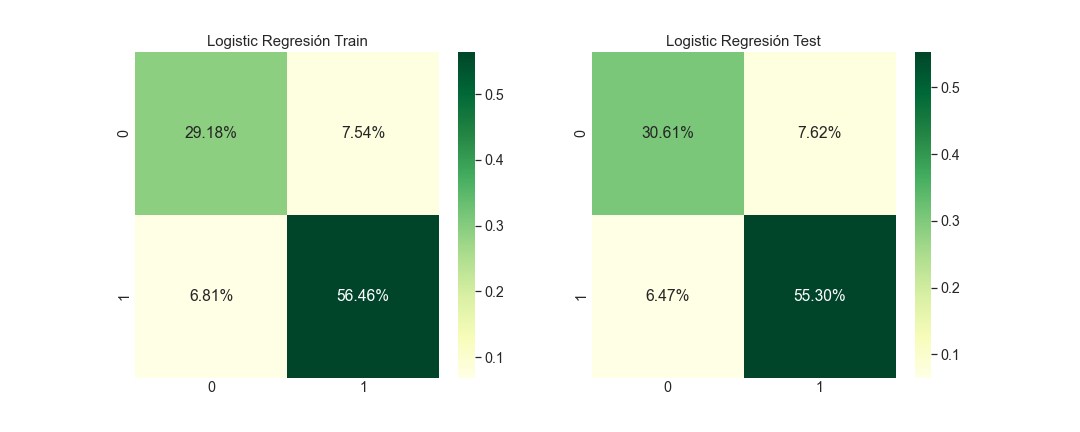

In [38]:
Image("../../util/Graficos/graf_lg_A_matriz.png")

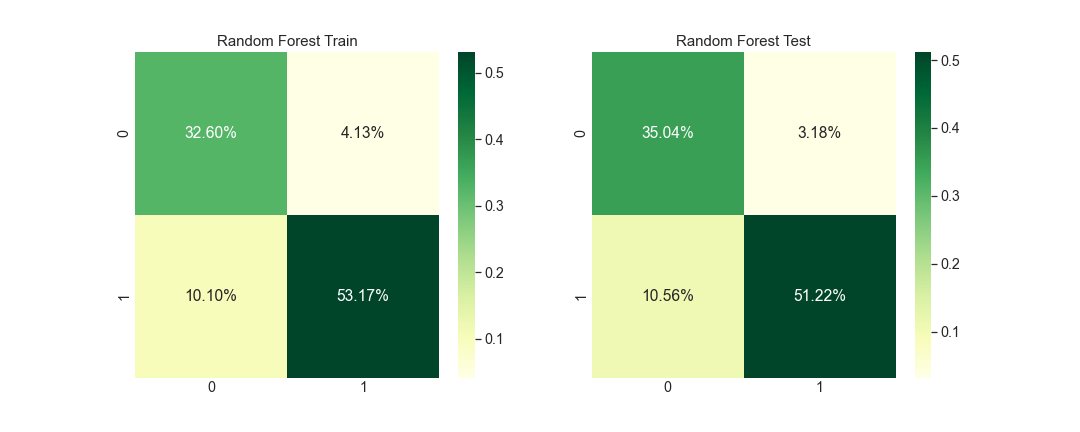

In [35]:
Image("../../util/Graficos/graf_rf_A_matriz.png")

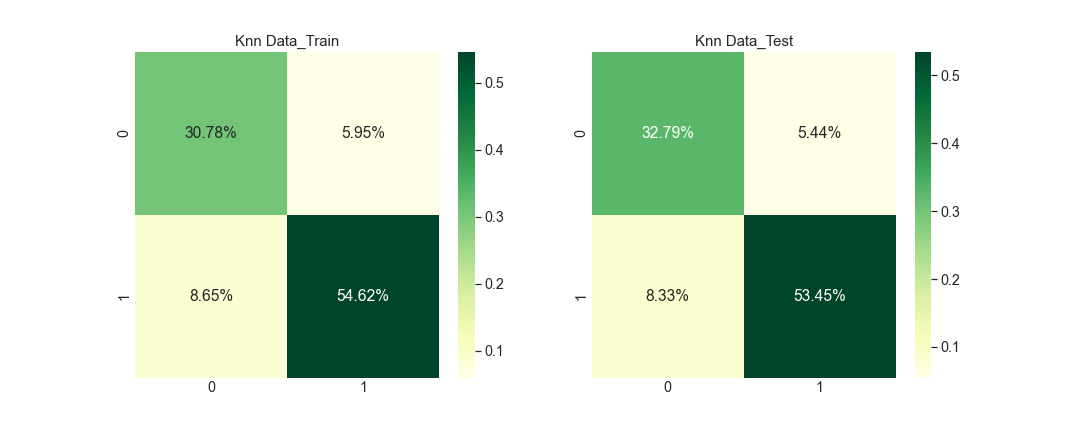

In [36]:
Image("../../util/Graficos/graf_knn_A_matriz.png")

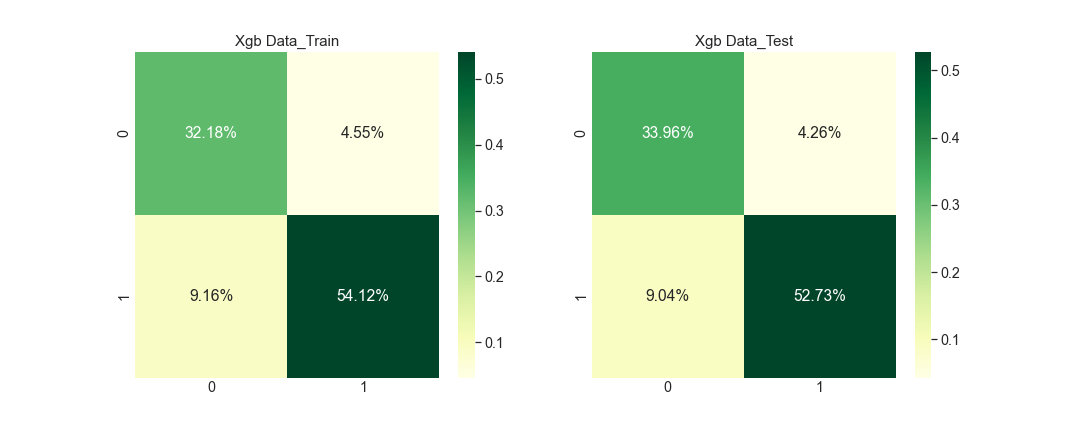

In [37]:
Image("../../util/Graficos/graf_xgb_A_matriz.png")

Podemos ver que el mejor modelo continua siendo Logistic Regresion, es el que mejor minima los falsos negativos que es lo que nos interesa

CONTINUAMOS EN ESTE CASO PRIORIZANDO LA ROC AUC

LOGISTIC REGRESION

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)


In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS
model_lr = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('lr', LogisticRegression())]
                    ) 


params = {'lr__penalty' : ['l1','l2','elasticnet'],
              'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
              'lr__max_iter': [100,200,300,400,500],
              'lr__C': [0.8,0.5,0.3]
            }


logistic_gtc = GridSearchCV(model_lr, params, cv=5, scoring='roc_auc')
logistic_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_lr_V2 = logistic_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES
model_lr_V2
model_lr_V2.fit(X_train,y_train)
y_predi = model_lr_V2.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAME MENO LA CONFUSION MATRIX
df_scores = {'log_re_data_train' :[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]}
df_scores = pd.DataFrame(df_scores, index=['Recall','Auc','Accuracy', 'F1_score'])

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_logist_V2', 'wb') as archivo_salida:
    pickle.dump(model_lr_V2, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_logist_V2', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

RANDOM FOREST

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN RANDOMIZE CON CROSS VALIDATIION PORQUE TARDA MENOS
# LO INSTANCIAMOS
model_rf = RandomForestClassifier() 


params = {'n_estimators' : range(100,500,100),
           'criterion': ['gini', 'entropy'],
           'max_depth':range(2,5),
           'max_leaf_nodes':range(2,10),
           'min_samples_split':range(50,300,50),
           'random_state' : [42],
            }


random_forest_gtc = RandomizedSearchCV(model_rf, params, cv=5, scoring='roc_auc', n_iter=100)
random_forest_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_rf_V2 = random_forest_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES
model_rf_V2
model_rf_V2.fit(X_train,y_train)
y_predi = model_rf_V2.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Roc.csv', index_col=0)
df_scores['rf_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_rf_V2', 'wb') as archivo_salida:
    pickle.dump(model_rf_V2, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_rf_V2', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['rf_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Roc.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

KNN

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

scale = MinMaxScaler()
scale.fit(X_train)

X_train_scale = scale.transform(X_train)
X_test_scale= scale.transform(X_test)

In [ ]:
# CON KNN VAMOS A VER PRIMERO CUAL ES EL MEJOR VALOR DE LA K SIN UTILIZAR GRIDSEARCH NI PIPELINE. ADEMAS ESCALO LOS DATOS PRIMERO

k_range= range(1,100)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_scale, y_train)
    scores.append(knn.score(X_test_scale, y_test))


In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(np.arange(0,100,5));

In [ ]:
# SACAMOS EL MEJOR SCORE

np.array(k_range)[scores ==max(scores)]

In [ ]:
# INVERTIMOS EL ESCALADO

X_train = scale.inverse_transform(X_train_scale)
X_test = scale.inverse_transform(X_test_scale)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN RANDOMIZW CROSS VALIDATIION
# LO INSTANCIAMOS

model_knn = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())]
                    )  


params = {'knn__n_neighbors' : range(20,75,1)
         }


model_knn_gtc = RandomizedSearchCV(model_knn, params, cv=5, scoring='roc_auc')
model_knn_gtc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_knn_V2 = model_knn_gtc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES

model_knn_V2.fit(X_train,y_train)
y_predi = model_knn_V2.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Roc.csv', index_col=0)
df_scores['knn_data_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]


In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_knn_V2', 'wb') as archivo_salida:
    pickle.dump(model_knn_V2, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_knn_V2', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['knn_data_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Roc.csv')

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

XGBOOST

In [ ]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [ ]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)

In [ ]:
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS

model_xgb = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('xgb', XGBClassifier())]
                    )  


params = {
          'xgb__max_depth' : range(3,10),
          'xgb__min_child_weight': range(1,50,3),
          'xgb__alpha': np.arange(0,0.5,0.1),
          'xgb__eta': np.arange(0.1,0.3,0.1)
         }


model_xgb_rsc = RandomizedSearchCV(model_xgb, params, cv=5, scoring='roc_auc',n_iter= 100)
model_xgb_rsc.fit(X_train, y_train)

In [ ]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_xgb_V2 = model_xgb_rsc.best_estimator_

In [ ]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES

model_xgb_V2.fit(X_train,y_train)
y_predi = model_xgb_V2.predict(X_test)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Roc.csv', index_col=0)
df_scores['xgb_data_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]


df_scores

In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [ ]:
# GUARDAMOS EL MODELO

with open('../Model/model_xgb_V2', 'wb') as archivo_salida:
    pickle.dump(model_xgb_V2, archivo_salida)

In [ ]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_xgb_V2', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [ ]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['xgb_data_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Roc.csv')


In [ ]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

RESUMEN SCORIN Y CONFUSION MATRIX ROC_AUC

In [ ]:
data_scores_accuracy = pd.read_csv('../../Model/scores_models_Roc.csv')
data_scores_accuracy

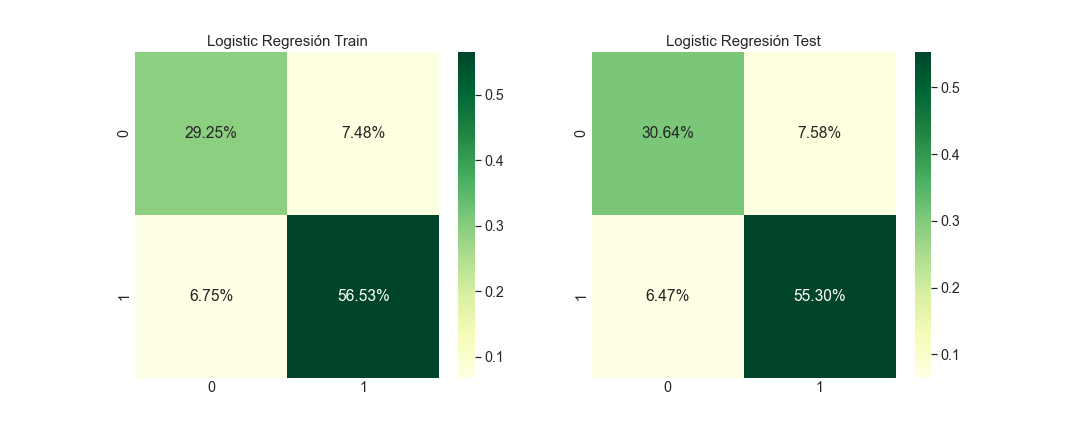

In [45]:
Image("../../util/Graficos/graf_lg_Roc_matriz.png")

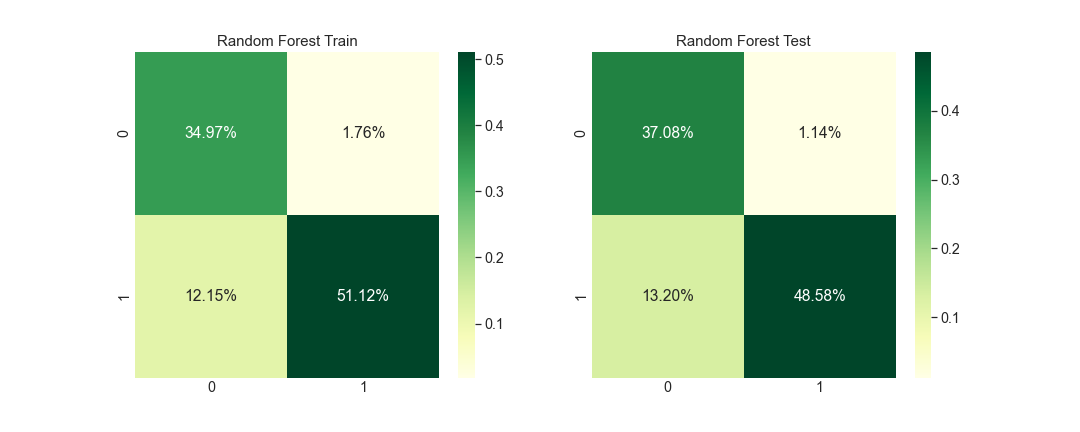

In [42]:
Image("../../util/Graficos/graf_rf_Roc_matriz.png")

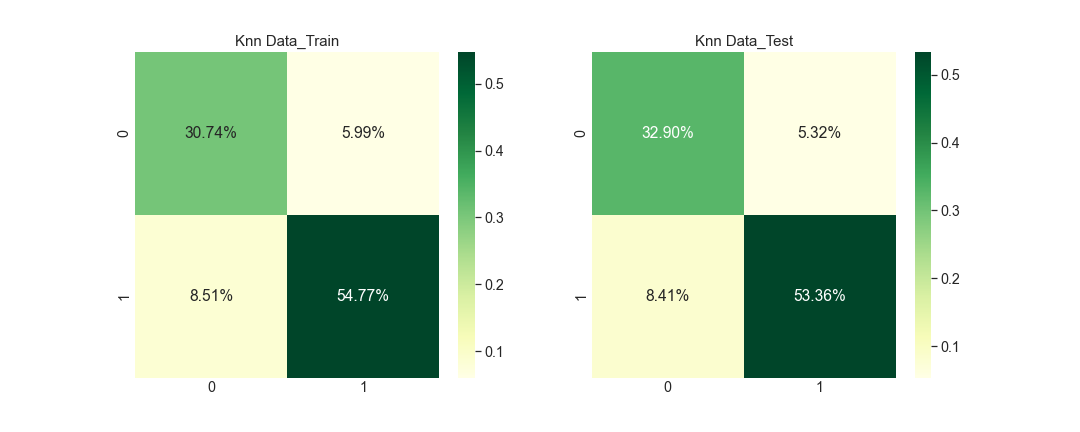

In [43]:
Image("../../util/Graficos/graf_knn_Roc_matriz.png")

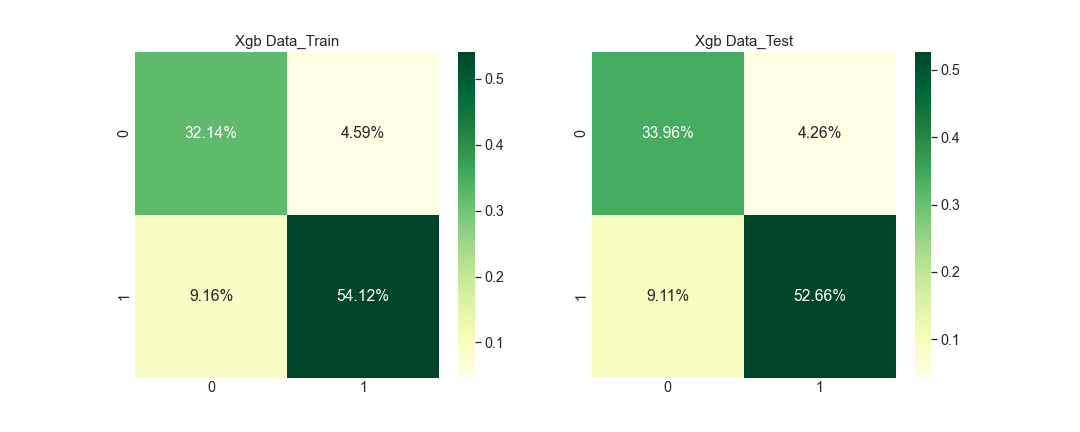

In [44]:
Image("../../util/Graficos/graf_xgb_Roc_matriz.png")

Definitivamente, el modelo que mejor se ha comportado es la Logistic Regresion con priorización en el scoring del Gridsearch para Recall dado unos resultados de 6,41% en false positives junto con un 30,53% de True negatives y

55,36% de True positive con lo que este es el modelo que selecciono